In [1]:
import pandas as pd
import locale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batting = pd.read_csv("data/batting.csv")
batting = batting[["playerID", "AB", "H", "BB", "HBP", "SF", "yearID"]]

pitching = pd.read_csv("data/Pitching.csv")
pitching = pitching[["playerID", "yearID", "W", "L", "ERA"]]

position = pd.read_csv("data/Appearances.csv")
position = position[["playerID","teamID", "lgID", "yearID","G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b",
                     "G_ss", "G_lf", "G_cf", "G_rf", "G_of"]]

name = pd.read_csv("data/Master.csv")
name = name[["playerID", "nameLast", "nameGiven"]]

salary = pd.read_csv("data/Salaries.csv")
salary = salary[["playerID", "salary", "yearID"]]

In [3]:
master_list = pd.merge(batting, position, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, pitching, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, salary, how="outer", on = ["playerID", "yearID"])
master_list = pd.merge(master_list, name, how="outer", on = "playerID")
master_list.index = master_list.pop("playerID")
master_list = master_list[master_list.yearID == 2008]
master_list.index = master_list.pop("nameLast")

In [4]:
pitchers = master_list[master_list.G_p >= 32]
pitchers.insert(3, "POS", "P")

catchers = master_list[master_list.G_c >= 81]
catchers.insert(3, "POS", "C")

first_base = master_list[master_list.G_1b >= 81]
first_base.insert(3, "POS", "1B")

second_base = master_list[master_list.G_2b >= 81]
second_base.insert(3, "POS", "2B")

third_base = master_list[master_list.G_3b >= 81]
third_base.insert(3, "POS", "3B")

short_stop = master_list[master_list.G_ss >= 81]
short_stop.insert(3, "POS", "SS")

left_field = master_list[master_list.G_lf >= 81]
left_field.insert(3, "POS", "LF")

center_field = master_list[master_list.G_cf >= 81]
center_field.insert(3, "POS", "CF")

right_field = master_list[master_list.G_rf >= 81]
right_field.insert(3, "POS", "RF")

In [5]:
master_list = pd.concat([catchers, first_base, second_base, third_base, short_stop, left_field, center_field, right_field])
for_averages = pd.concat([pitchers, catchers, first_base, second_base, third_base, short_stop, left_field, center_field, right_field])

In [6]:
master_list = master_list.drop(["G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of", "W", "L", "ERA"], axis=1)

for_averages = for_averages.drop(["G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of", "W", "L", "ERA"], axis=1)

pitchers = pitchers.drop(["G_all", "G_p", "G_c", "G_1b", "G_2b", "G_3b", "G_ss", "G_lf", "G_cf", "G_rf", "G_of"], axis=1)

In [7]:
master_list["OBA"] = (master_list.H + master_list.BB + master_list.HBP)/(master_list.AB + master_list.BB + master_list.HBP + master_list.SF)
pitchers["OBA"] = (pitchers.H + pitchers.BB + pitchers.HBP)/(pitchers.AB + pitchers.BB + pitchers.HBP + pitchers.SF)
for_averages["OBA"] = (for_averages.H + for_averages.BB + for_averages.HBP)/(for_averages.AB + for_averages.BB + for_averages.HBP + for_averages.SF)

In [8]:
pitchers = pitchers.dropna(how="any")
pitchers = pitchers[pitchers.OBA != 0.0]
pitchers = pitchers[pitchers.AB >= 50]
pitchers = pitchers.drop_duplicates()
pitchers = pitchers.sort(columns="OBA", axis=0, ascending=False)

In [9]:
master_list = master_list.dropna(how="any")
master_list = master_list[master_list.OBA != 0.0]
master_list = master_list[master_list.AB >= 300]
master_list = master_list.drop_duplicates()
master_list = master_list.sort(columns="OBA", axis=0, ascending=False)

In [10]:
std_OBA = for_averages["OBA"].std(axis=0)
average_OBA = for_averages["OBA"].mean(axis=0)
std_salary = for_averages["salary"].std(axis=0)
average_salary = for_averages["salary"].mean(axis=0)

In [11]:
master_list["z_OBA"] = (master_list.OBA - average_OBA)/std_OBA
master_list["z_salary"] = (master_list.salary - average_salary)/std_salary

pitchers["z_OBA"] = (pitchers.OBA - average_OBA)/std_OBA
pitchers["z_salary"] = (pitchers.salary - average_salary)/std_salary

In [12]:
master_list["z_OBA_sal"] = master_list["z_OBA"] - master_list["z_salary"]

pitchers["z_OBA_sal"] = pitchers["z_OBA"] - pitchers["z_salary"]

In [13]:
master_list = master_list.sort(columns="z_OBA_sal", axis = 0, ascending = False)
master_list = master_list[master_list.z_OBA_sal > 0.0]

pitchers = pitchers.sort(columns="z_OBA_sal", axis = 0, ascending = False)
pitchers = pitchers[pitchers.W > 10]
pitchers = pitchers[pitchers.W > pitchers.L]

In [14]:
catchers = master_list[master_list["POS"] == "C"]
first_base = master_list[master_list["POS"] == "1B"]
second_base = master_list[master_list["POS"] == "2B"]
third_base = master_list[master_list["POS"] == "3B"]
short_stop = master_list[master_list["POS"] == "SS"]
left_field = master_list[master_list["POS"] == "LF"]
center_field = master_list[master_list["POS"] == "CF"]
right_field = master_list[master_list["POS"] == "RF"]

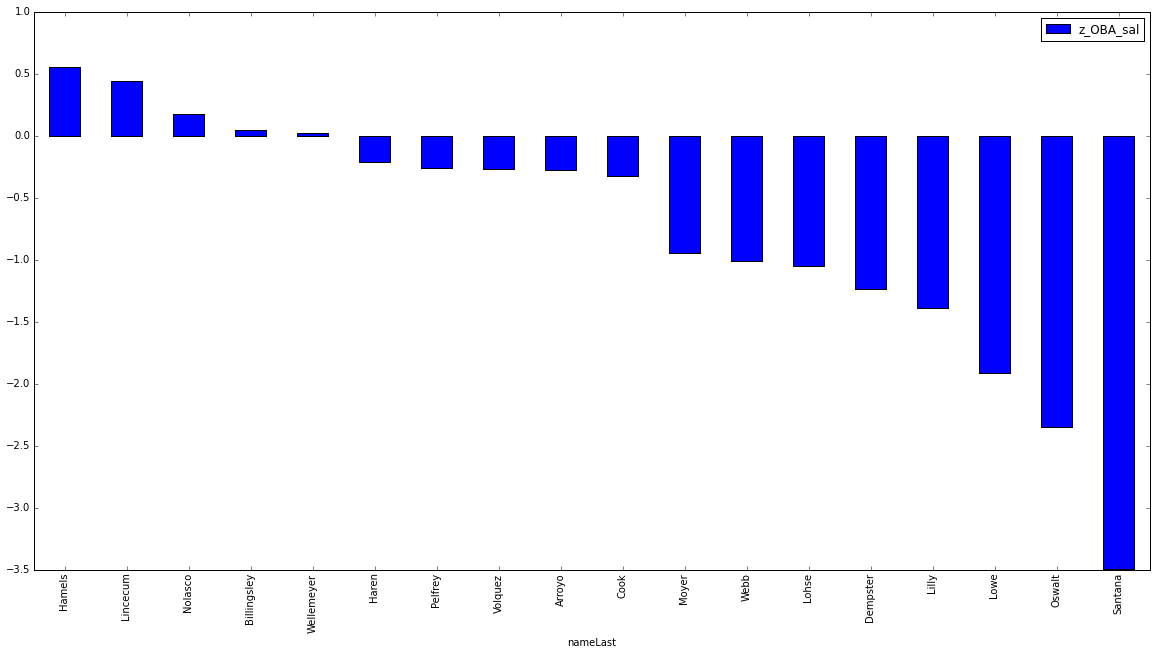

In [15]:
pitchers[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

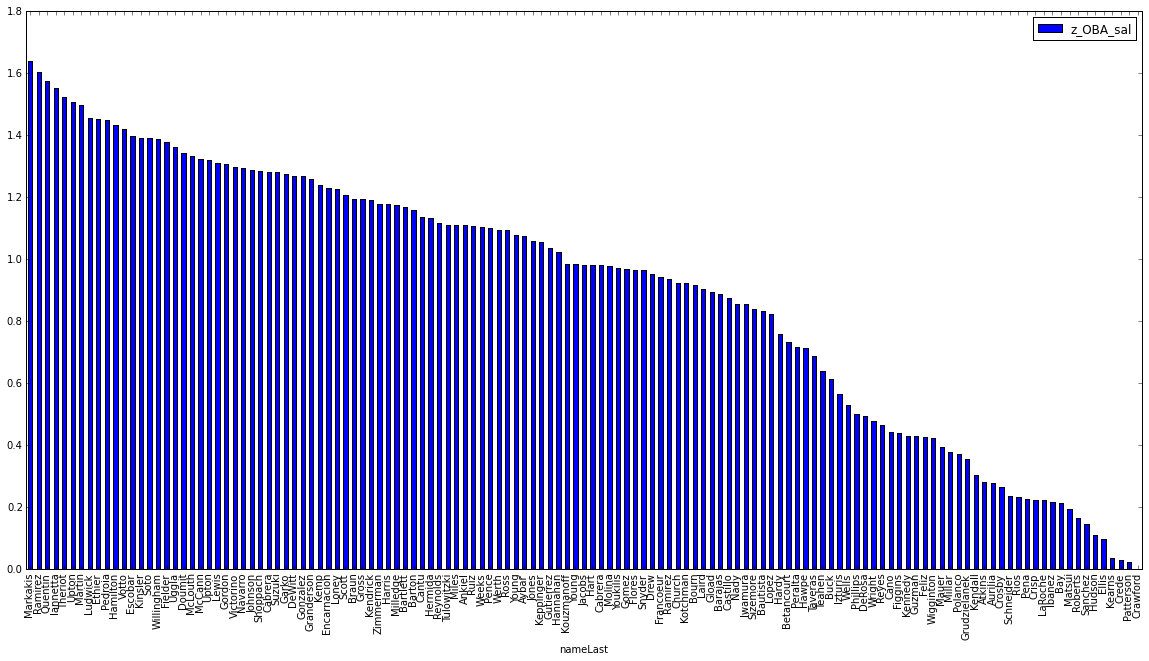

In [16]:
master_list[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

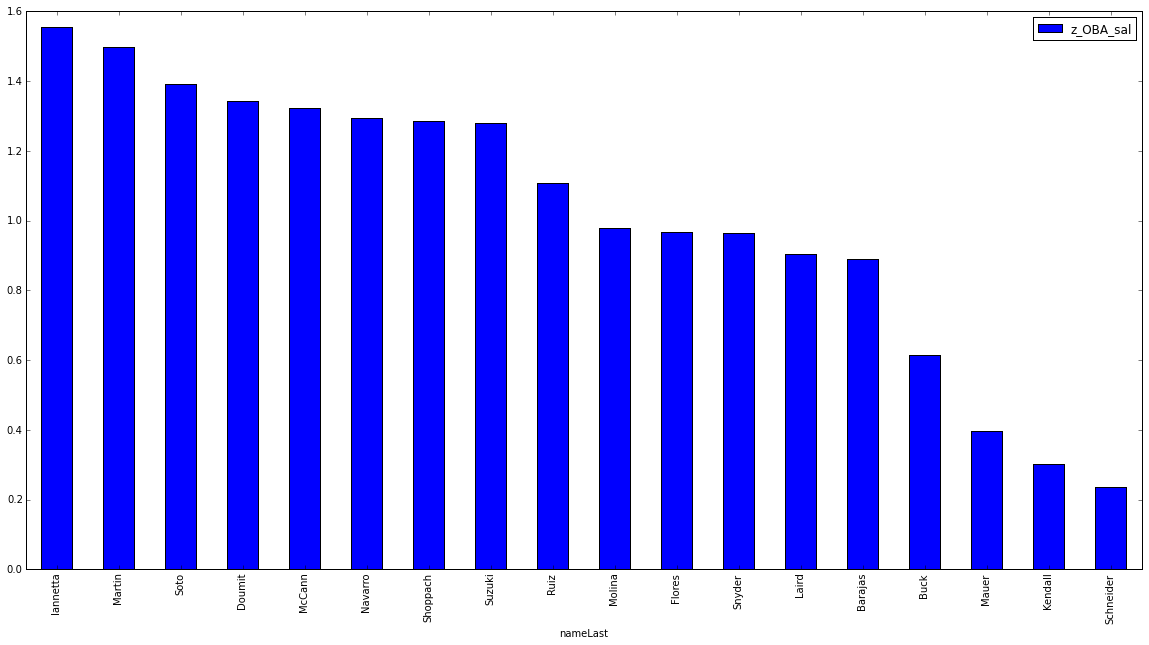

In [17]:
catchers[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

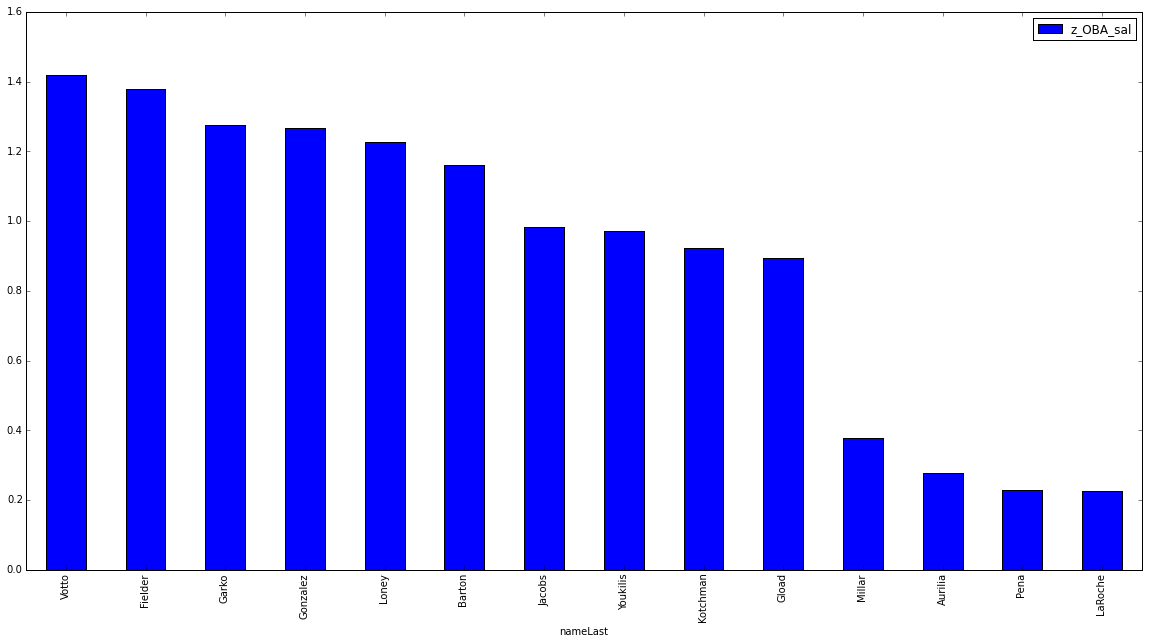

In [18]:
first_base[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

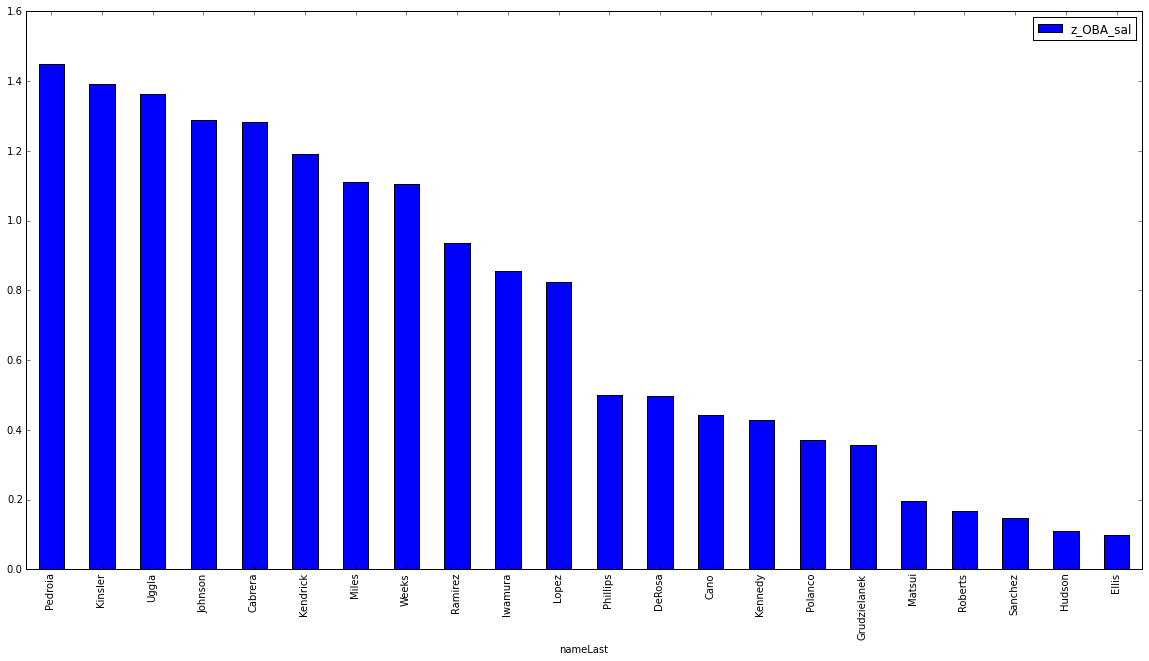

In [19]:
second_base[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

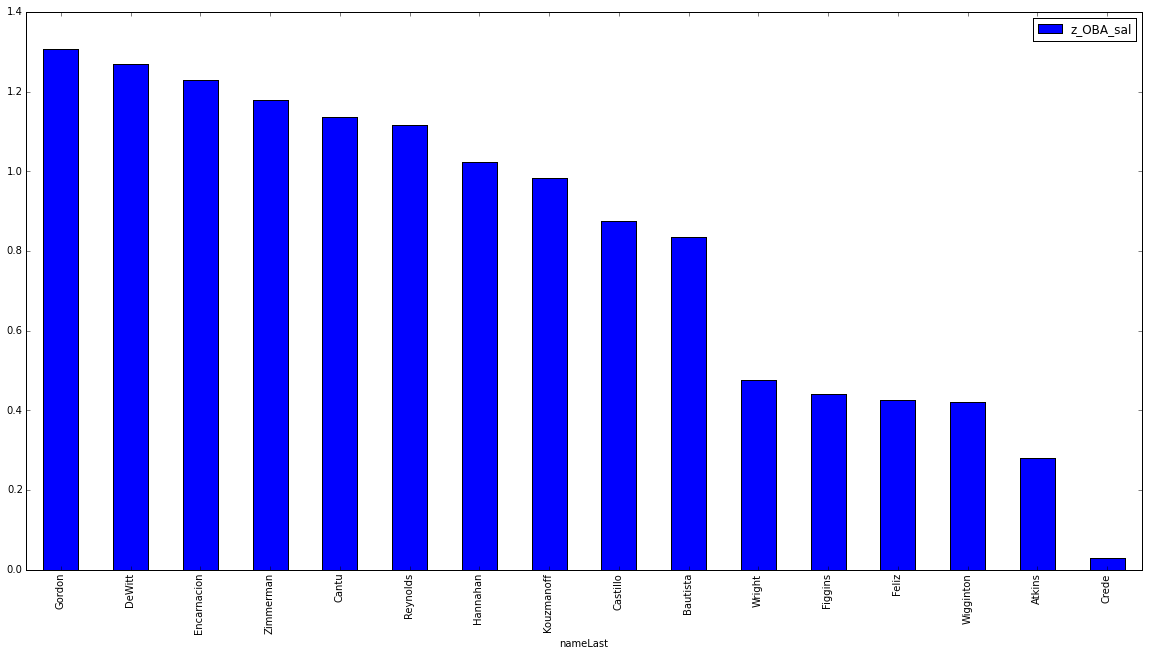

In [20]:
third_base[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

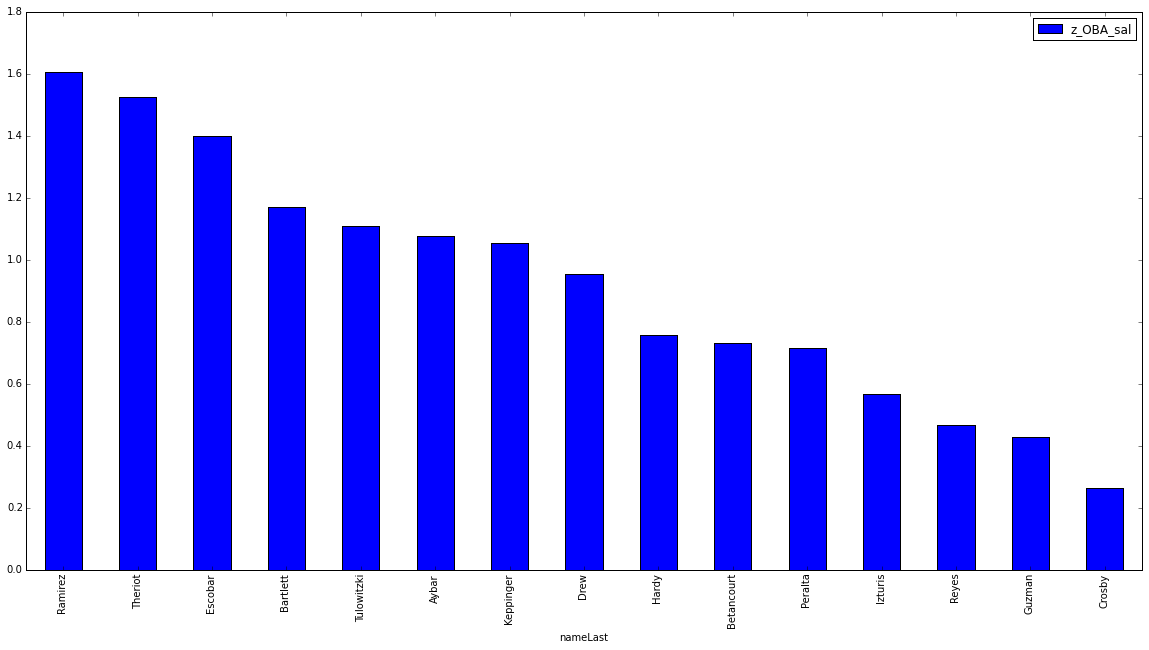

In [21]:
short_stop[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

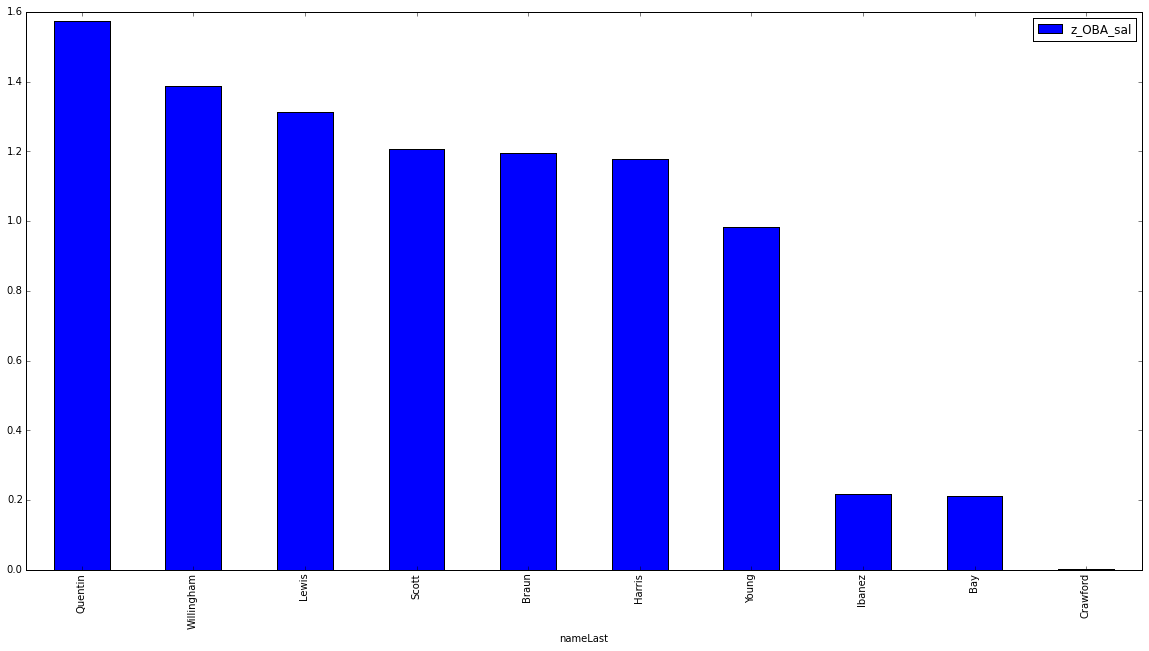

In [22]:
left_field[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

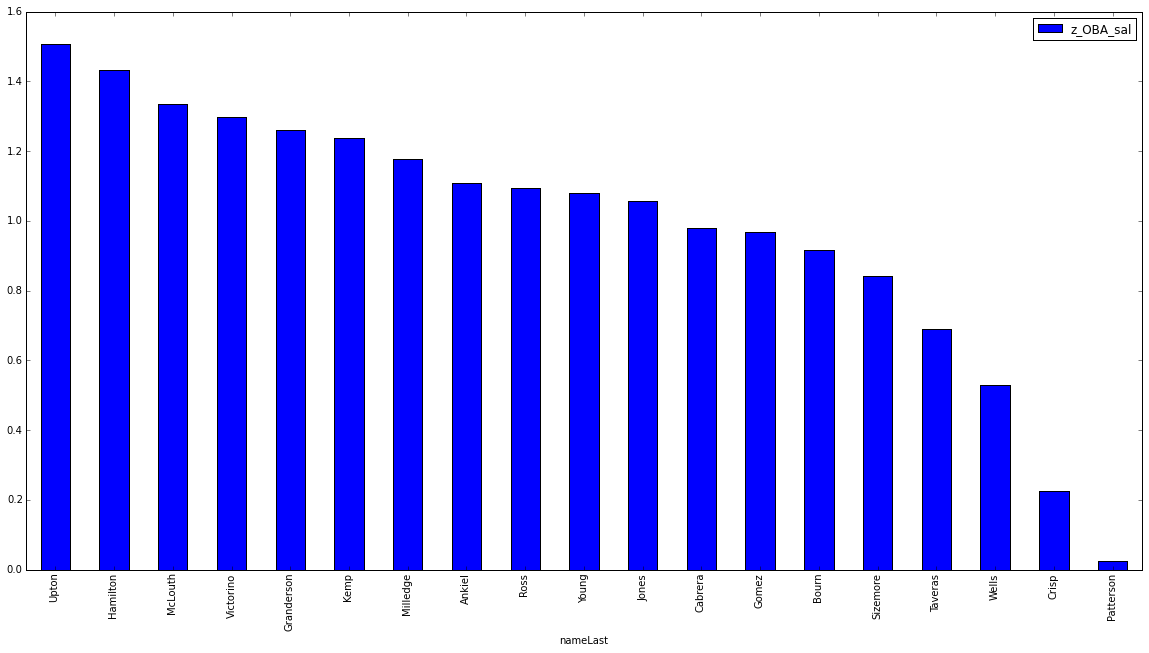

In [23]:
center_field[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

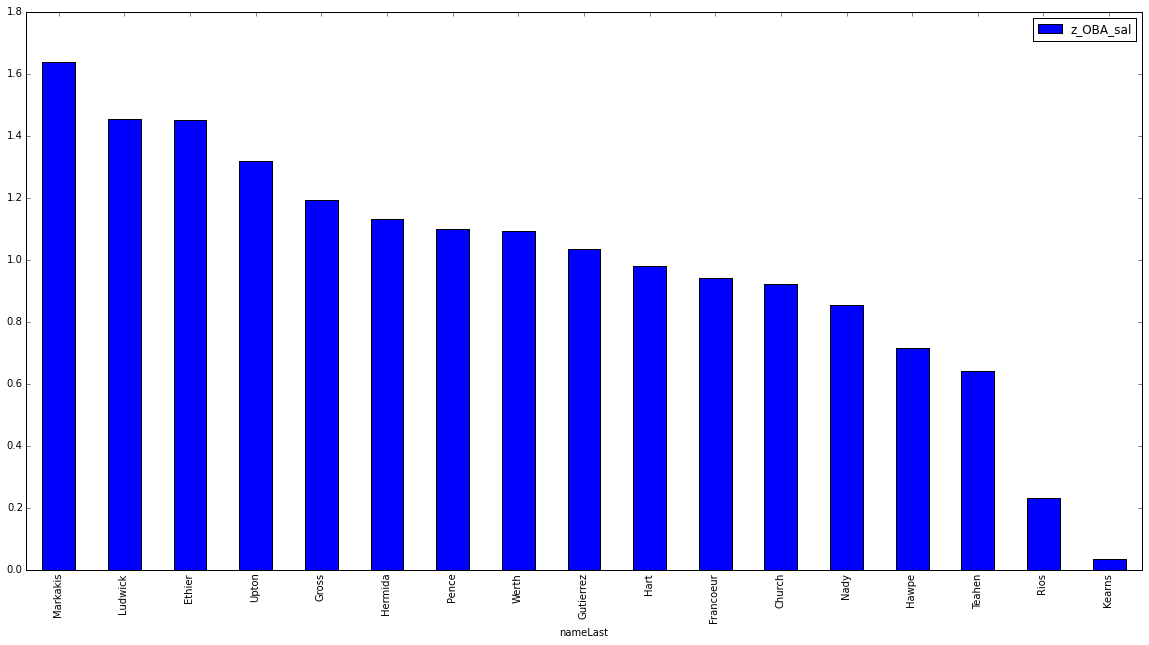

In [24]:
right_field[["z_OBA_sal"]].plot(kind="bar", figsize=(20, 10))

In [25]:
my_team = pd.concat([pitchers.head(1), catchers.head(1), first_base.head(1), second_base.head(1), third_base.head(1), short_stop.head(1), left_field.head(1), center_field.head(1), right_field.head(1)])
my_team_avg_OBA = my_team["OBA"].mean(axis=0)
my_team_avg_sal = my_team["salary"].mean(axis=0)

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


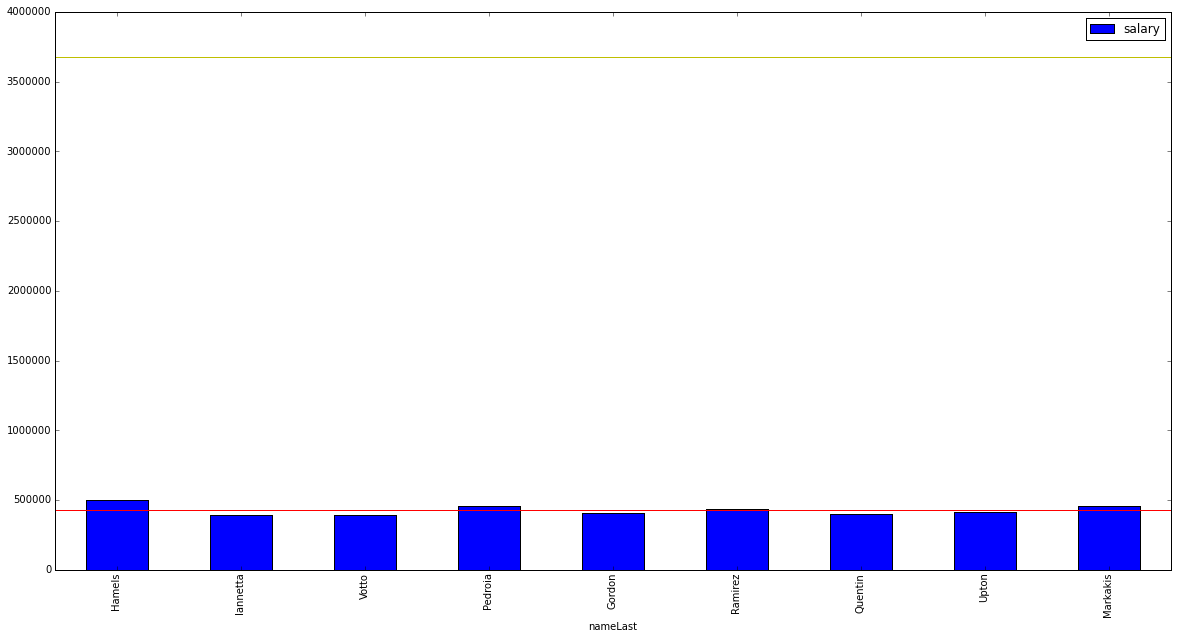

In [26]:
my_teams_sal = my_team[["salary"]].plot(kind="bar", figsize=(20, 10))
xmin, xmax = my_teams_sal.get_xlim()
my_teams_sal.hlines(y = [my_team_avg_sal, average_salary],xmin=xmin, xmax=xmax, color=['r', 'y'])

/Users/MatthewBarnette/iron_yard_hw/moneyball/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


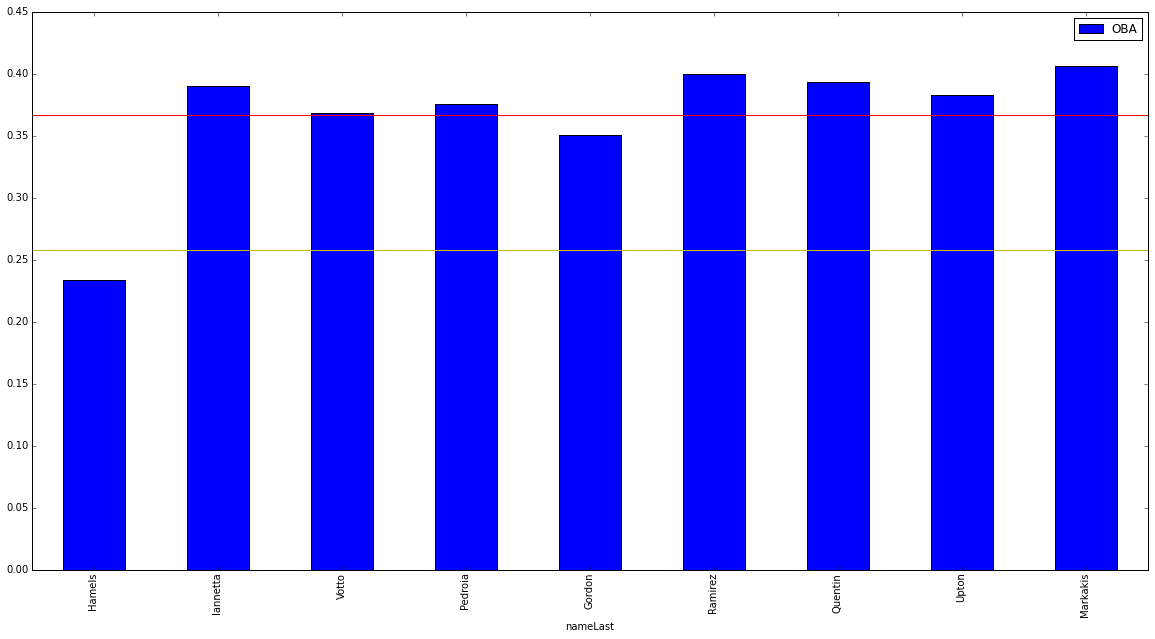

In [27]:
my_teams_OBA = my_team[["OBA"]].plot(kind="bar", figsize=(20, 10))
xmin, xmax = my_teams_OBA.get_xlim()
my_teams_OBA.hlines(y = [my_team_avg_OBA, average_OBA],xmin=xmin, xmax=xmax, color=['r', 'y'])

In [28]:
my_team

,AB,BB,ERA,H,HBP,L,OBA,POS,SF,W,lgID,nameGiven,salary,teamID,yearID,z_OBA,z_OBA_sal,z_salary
nameLast,,,,,,,,,,,,,,,,,,
Hamels,76,0,3.09,17,1,10,0.233766,P,0,14,NL,Colbert Michael,500000,PHI,2008,-0.151178,0.553922,-0.705100
Iannetta,333,56,NaN,88,14,NaN,0.390123,C,2,NaN,NL,Christopher Domenic,396000,COL,2008,0.825644,1.553854,-0.728210
Votto,526,59,NaN,156,2,NaN,0.368421,1B,2,NaN,NL,Joseph Daniel,390000,CIN,2008,0.690061,1.419604,-0.729543
Pedroia,653,50,NaN,213,7,NaN,0.375522,2B,9,NaN,AL,Dustin Luis,457000,BOS,2008,0.734421,1.449076,-0.714655
Gordon,493,66,NaN,128,6,NaN,0.350877,3B,5,NaN,AL,Alex Jonathan,406000,KCA,2008,0.580458,1.306446,-0.725988
Ramirez,589,92,NaN,177,8,NaN,0.399711,SS,4,NaN,NL,Hanley,439000,FLO,2008,0.885544,1.604199,-0.718655
Quentin,480,66,NaN,138,20,NaN,0.393673,LF,3,NaN,AL,Carlos Jose,400000,CHA,2008,0.847820,1.575141,-0.727321
Upton,531,97,NaN,145,2,NaN,0.383046,CF,7,NaN,AL,Melvin Emanuel,412100,TBA,2008,0.781426,1.506058,-0.724632
Markakis,595,99,NaN,182,2,NaN,0.406026,RF,1,NaN,AL,Nicholas William,455000,BAL,2008,0.924992,1.640092,-0.715100
